In [4]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-deep")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Liberation Serif"]
plt.rcParams["font.size"] = 16
plt.rcParams["savefig.pad_inches"] = 0.1

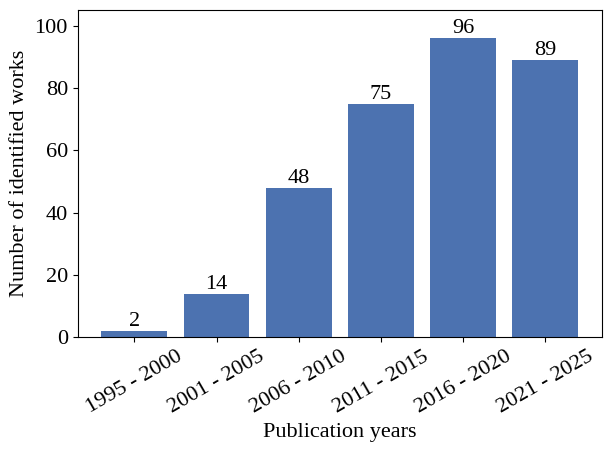

In [5]:
plt.clf()
plt.xlabel("Publication years")
plt.ylabel("Number of identified works")
plt.ylim(0, 105)
plt.xticks(rotation=30)
b = plt.bar(
    x=["1995 - 2000", "2001 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2025"],
    height=[2, 14, 48, 75, 96, 89]
)
plt.bar_label(b)
plt.tight_layout()
plt.savefig("./out/sr-per-year.pdf")

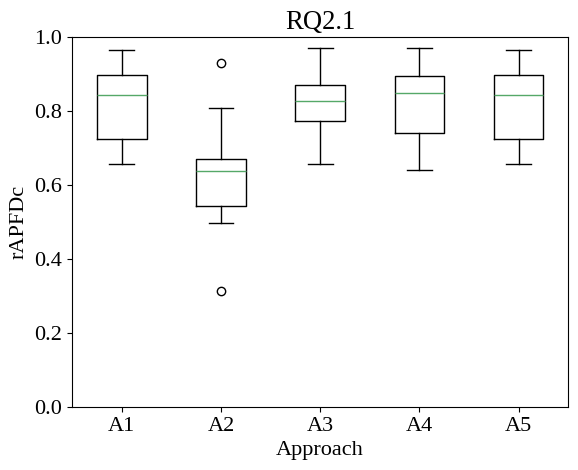

In [6]:
with Path.open("../tcp-framework/out/rq21.json", "r") as f:
    rq21 = json.load(f)
values = [[sum(ds[ai]) / len(ds[ai]) for ds in rq21.values()] for ai in range(5)]
plt.clf()
plt.title("RQ2.1")
plt.xlabel("Approach")
plt.ylabel("rAPFDc")
plt.ylim(bottom=0.0, top=1.0)
plt.boxplot(values, tick_labels=["A1", "A2", "A3", "A4", "A5"])
plt.savefig("./out/rq21.pdf")